In [ ]:
# 2 frameworks that allow you build deep learning (NN) models:  TensorFlow, PyTorch
# 1. You don't need to understand everything (at least not right now) to be effective and use NN
# 2. You do NOT need to know the math first! 
# 3. You do NOT need to know how the algos work (at least not now)
# 4. You do NOT need to know Python. 
# 5. You do NOT need to be a deep learning expert

In [ ]:
# check version
import tensorflow
print(tensorflow.__version__)

2.9.2


In [ ]:
# 5 step Model Life-Cycle
# 1. Define the Model
'''
...
# define the model
model = ...
'''
# 2. Compile the Model
'''
...
# compile the model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

The three most common loss functions are:

‘binary_crossentropy‘ for binary classification
‘sparse_categorical_crossentropy‘ for multi-class classification
‘mse‘ (mean squared error) for regression

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers  # Adam is what you should always start with
https://www.tensorflow.org/api_docs/python/tf/keras/losses
https://www.tensorflow.org/api_docs/python/tf/keras/metrics
'''
# 3. Fit the Model
'''
epochs = # of loops through the training dataset
batch size = # of samples in epoch use to estimate the model error
...
# fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0)
'''
# 4. Evaluate the Model
'''
...
# evaluate the model
loss = model.evaluate(X, y, verbose=0)
'''

# 5. Make Predictions
'''
...
# make a prediction
yhat = model.predict(X)
'''

'\n...\n# make a prediction\nyhat = model.predict(X)\n'

In [ ]:
# example of a model defined with the sequential api
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define the model
model = Sequential()
model.add(Dense(10, input_shape=(8,)))
model.add(Dense(1))

In [ ]:
# example of a model defined with the sequential api
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define the model
model = Sequential()
model.add(Dense(100, input_shape=(8,)))
model.add(Dense(80))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))

# Binary Classification

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
path = 'https://raw.githubusercontent.com/fenago/datasets/main/ionosphere.csv'

In [ ]:
df = read_csv(path,header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [ ]:
# Split the dataset into X and y
X,y = df.values[:,:-1,],df.values[:,-1]

In [ ]:
X = X.astype('float32')


In [ ]:
# encode the target
y = LabelEncoder().fit_transform(y)

In [ ]:
# Split the data
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.33)
print(X_train,X_test,y_train,y_test)

[[ 1.       0.       1.      ... -1.       0.       0.     ]
 [ 0.       0.      -1.      ... -1.       0.       0.     ]
 [ 1.       0.       1.      ... -0.73145  0.13994 -0.7    ]
 ...
 [ 1.       0.       0.88241 ... -0.82127  0.00194 -0.81686]
 [ 1.       0.       1.      ... -0.44262  0.4918  -0.06557]
 [ 1.       0.       1.      ... -1.       1.      -1.     ]] [[ 1.0000e+00  0.0000e+00  2.5000e-01 ... -4.0800e-03  2.5000e-04
  -2.9100e-03]
 [ 1.0000e+00  0.0000e+00  1.0000e+00 ... -3.5222e-01  9.8816e-01
   3.4460e-02]
 [ 1.0000e+00  0.0000e+00  9.1241e-01 ...  1.0754e-01  6.5258e-01
   1.1447e-01]
 ...
 [ 1.0000e+00  0.0000e+00  3.6876e-01 ...  1.0800e-03  1.5000e-04
   3.2500e-03]
 [ 1.0000e+00  0.0000e+00  0.0000e+00 ...  9.0426e-01 -6.7553e-01
   4.5745e-01]
 [ 1.0000e+00  0.0000e+00  8.8103e-01 ... -1.8542e-01  9.1747e-01
  -1.6827e-01]] [0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0
 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 

In [ ]:
# determine the number of input features
n_features = X_train.shape[1]
n_features

34

In [ ]:
# define the model
model = Sequential()
model.add(Dense(10,activation='relu', kernel_initializer='he_normal',input_shape=(n_features,)))
model.add(Dense(8,activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
# compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
# fit the model (train it)
model.fit(X_train,y_train, epochs=150,batch_size=32, verbose = 0)

In [ ]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.905


In [ ]:
# make a prediction
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

1/1 [==============================] - 0s 304ms/step
Predicted: 0.975


# Multiclass Classification

In [ ]:
# mlp for multiclass classification
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
path = 'https://raw.githubusercontent.com/fenago/datasets/main/iris.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)
# make a prediction
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

(100, 4) (50, 4) (100,) (50,)
Test Accuracy: 0.880
1/1 [==============================] - 0s 62ms/step
Predicted: [[0.8103352  0.13067143 0.05899327]] (class=0)


# Regression

In [ ]:
# mlp for regression
from numpy import sqrt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
path = 'https://raw.githubusercontent.com/fenago/datasets/main/housing.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse')
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))
# make a prediction
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

(339, 13) (167, 13) (339,) (167,)
MSE: 39.261, RMSE: 6.266
1/1 [==============================] - 0s 77ms/step
Predicted: 31.695


# CNN

11490434/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


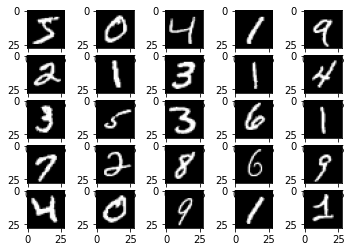

In [ ]:
# example of loading and plotting the mnist dataset
from tensorflow.keras.datasets.mnist import load_data
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(25):
 # define subplot
 pyplot.subplot(5, 5, i+1)
 # plot raw pixel data
 pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [ ]:

# example of a cnn for image classification
from numpy import asarray
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
# load dataset
(x_train, y_train), (x_test, y_test) = load_data()
# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
# determine the shape of the input images
in_shape = x_train.shape[1:]
# determine the number of classes
n_classes = len(unique(y_train))
print(in_shape, n_classes)
# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)
# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
# make a prediction
image = x_train[1]
yhat = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(yhat))

(28, 28, 1) 10
Accuracy: 0.987
1/1 [==============================] - 0s 56ms/step
Predicted: class=5


In [ ]:
image = x_train[8]
yhat = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(yhat))

1/1 [==============================] - 0s 19ms/step
Predicted: class=1


In [ ]:

# example of summarizing a model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# summarize the model
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                90        
                                                                 
 dense_23 (Dense)            (None, 8)                 88        
                                                                 
 dense_24 (Dense)            (None, 1)                 9         
                                                                 
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


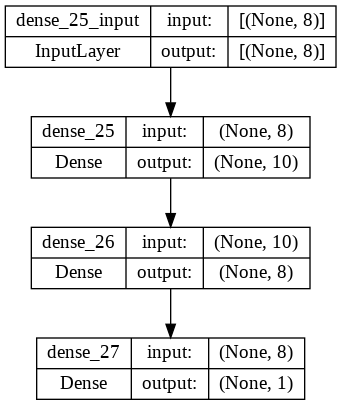

In [ ]:

# example of plotting a model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# summarize the model
plot_model(model, 'model.png', show_shapes=True)